In [ ]:
# Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
# Perform following steps:
# Distinguish the feature and target set and divide the data set into training and test sets.
# Normalize the train and test data. Initialize and build the model. Identify the points of improvement and implement the same.
# Print the accuracy score and confusion matrix, Plot AUC and ROC Graphs
# Perform following
# i)    Plot graph of gender( male, female)  customers,  CreditCard v/s customers
#               activemember customers v/s churn , customers v/scountries
# ii)     Density plots of (a) observed balance, (b) owned product quantity, (c) credit score, and (d) tenure.
# iii)     Plot of Distribution of customers based on credit score and age.
# iv)      Correlation matrix of attributes
# Perform customer churn prediction using following ML algorithms

# i)                    Random Forest ,ii)                   KNN algorithm

# iii)                 Logistic regression, iv)                 Support vector machine

# v)                  XGBoost, vi)                 Naïve Bays

# vii)               Linear Discernment and quadratic discernment algorithm

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Ensure there are no more missing values
missing_values = df.isnull().sum()
print("Missing values after handling:")
print(missing_values)

Missing values after handling:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [8]:
print(df.info())  # This will show data types and any missing values

# Handle missing values in Gender and convert types
df = df.dropna(subset=['Gender'])
df['Gender']=df['Gender'].astype('category')
df['HasCrCard']=df['HasCrCard'].replace({0:'No',1:'Yes'}).astype('category')
df['Exited']=df['Exited'].replace({0:'No',1:'Yes'}).astype('category')

# Verify the data before plotting
print(df.head())  # Inspect first few rows
print(df.columns)  # List all columns

# Check dimensions of the data
print(df.shape) 
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

In [26]:
#i) Plot gender vs credit card ownership, active members vs churn, and country-wise distribution
import seaborn as sns
import matplotlib.pyplot as plt
# Check data types and handle missing values
df = df.dropna(subset=['Gender'])
df['Gender']=df['Gender'].astype('category')
df['HasCrCard']=df['HasCrCard'].replace({0:'No',1:'Yes'}).astype('category')
df['Exited']=df['Exited'].replace({0:'No',1:'Yes'}).astype('category')

# 1. Gender vs Credit Card Ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='HasCrCard',df=df)
plt.title('Gender vs Credit Card Ownership')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

# 2. Active Members vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='IsActiveMember', hue='Exited', df=df)
plt.title('Active Members vs Churn')
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No Churn', 'Churn'])
plt.show()

# 3. Country-wise Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Geography', df=df, order=df['Geography'].value_counts().index)
plt.title('Country-wise Distribution of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()


ValueError: Could not interpret input 'Gender'

<Figure size 1000x600 with 0 Axes>

C:\Users\Dell\AppData\Local\Temp\ipykernel_7292\3545522261.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Balance'], shade=True)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


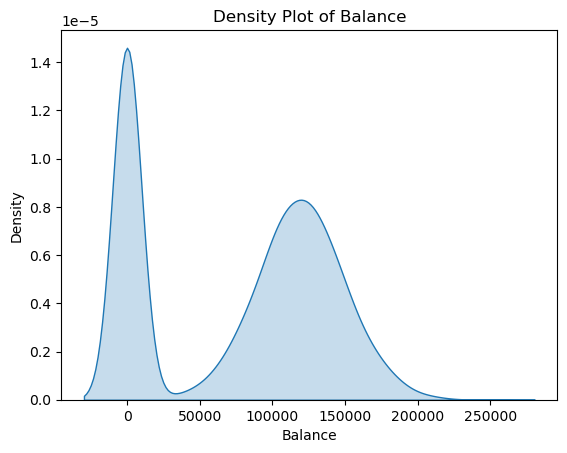

C:\Users\Dell\AppData\Local\Temp\ipykernel_7292\3545522261.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['NumOfProducts'], shade=True)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


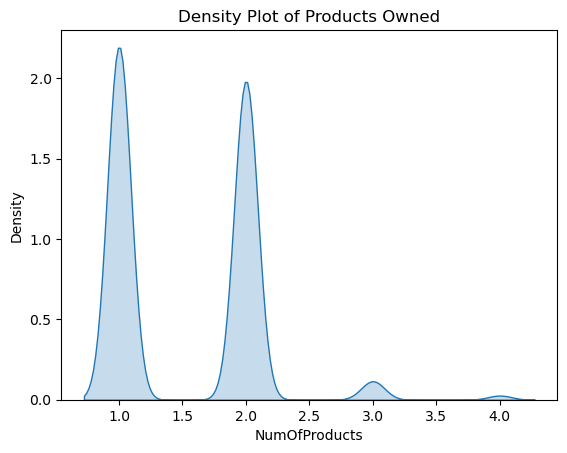

C:\Users\Dell\AppData\Local\Temp\ipykernel_7292\3545522261.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CreditScore'], shade=True)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


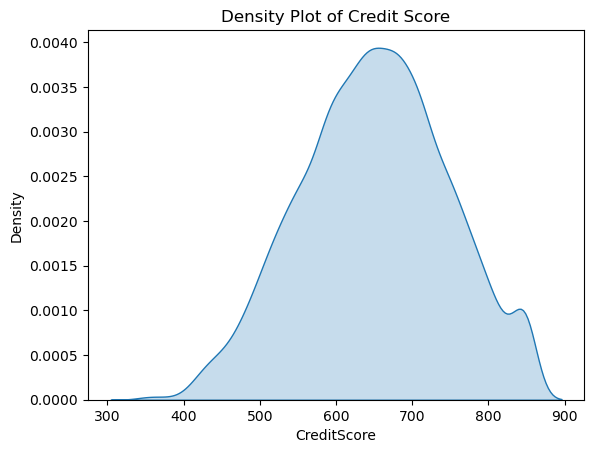

C:\Users\Dell\AppData\Local\Temp\ipykernel_7292\3545522261.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tenure'], shade=True)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


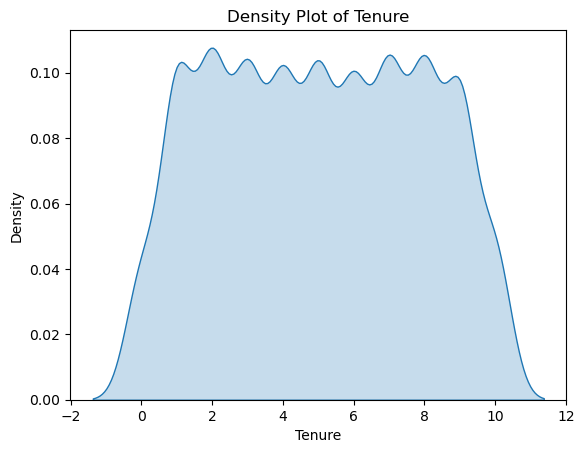

In [10]:
#ii

# Observed Balance Density Plot
sns.kdeplot(df['Balance'], shade=True)
plt.title('Density Plot of Balance')
plt.show()

# Owned Products Density Plot
sns.kdeplot(df['NumOfProducts'], shade=True)
plt.title('Density Plot of Products Owned')
plt.show()

# Credit Score Density Plot
sns.kdeplot(df['CreditScore'], shade=True)
plt.title('Density Plot of Credit Score')
plt.show()

# Tenure Density Plot
sns.kdeplot(df['Tenure'], shade=True)
plt.title('Density Plot of Tenure')
plt.show()

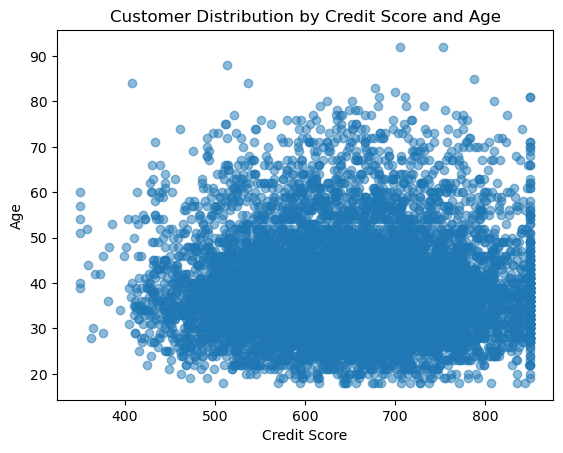

In [11]:
#iii

# Scatter plot of Credit Score vs Age
plt.scatter(df['CreditScore'], df['Age'], alpha=0.5)
plt.title('Customer Distribution by Credit Score and Age')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

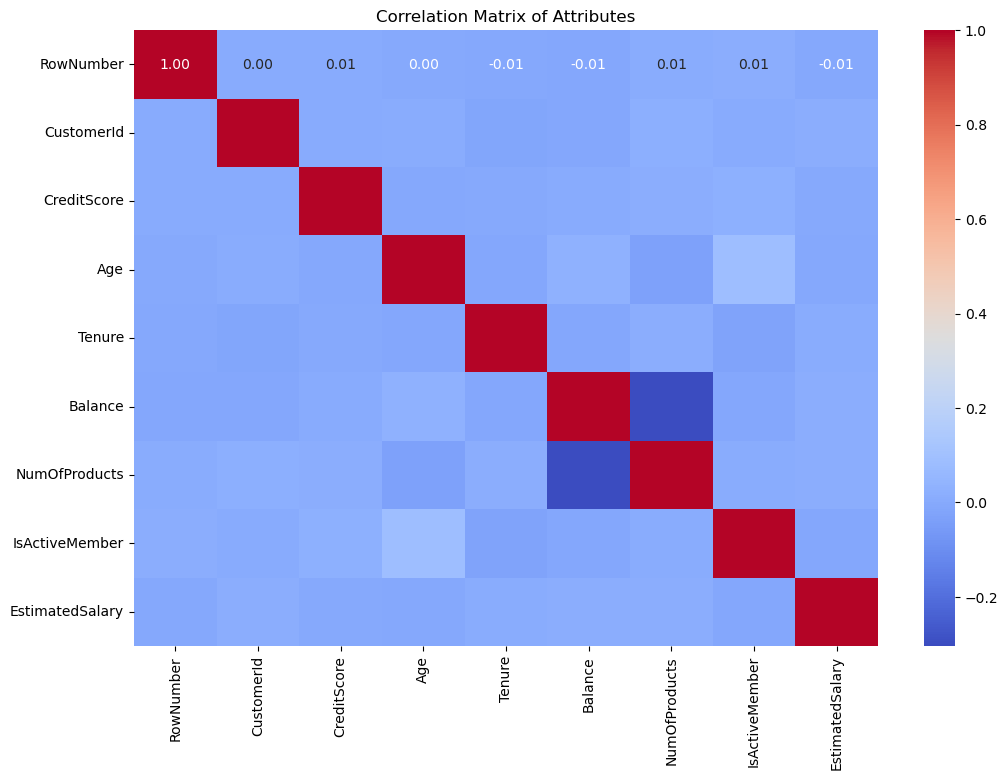

In [13]:
#iv
from sklearn.preprocessing import LabelEncoder
# Correlation Matrix
# Encode categorical variables to numeric
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Female = 0, Male = 1
df['HasCrCard'] = label_encoder.fit_transform(df['HasCrCard'])  # No = 0, Yes = 1
df['Exited'] = label_encoder.fit_transform(df['Exited'])  # No Churn = 0, Churn = 1

# Calculate correlation matrix


numeric_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

X=df.drop(columns=['Exited','CustomerId','Surname'])
y=df['Exited']

# Encode categorical features
label_encoder = LabelEncoder()
X['Geography'] = label_encoder.fit_transform(X['Geography'])
X['Gender'] = label_encoder.fit_transform(X['Gender'])


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
#normalize
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
## Comparison with Other ML Algorithms

results={}

#i Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf=confusion_matrix(y_test, y_pred_rf)
cf_report=classification_report(y_test,y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Confusion Matrix')
print(cm_rf)
print('Classification report')
print(cf_report)



Random Forest Accuracy: 0.864
Confusion Matrix
[[1549   58]
 [ 214  179]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



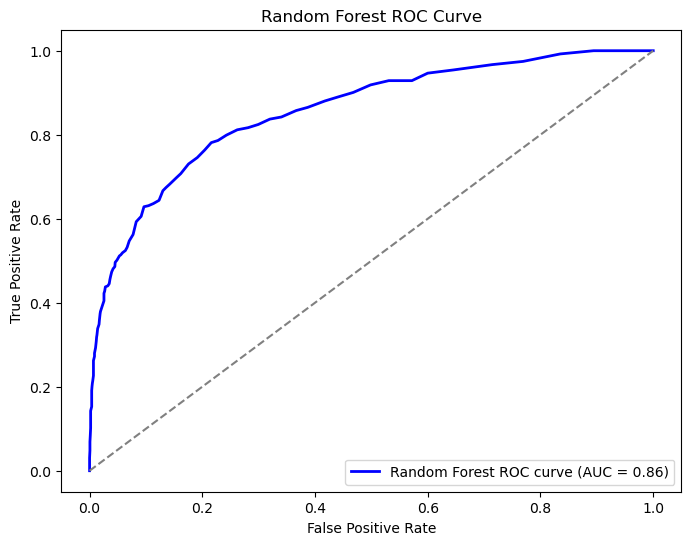

In [17]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Predict probabilities for the positive class
y_scores_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [18]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')


KNN Accuracy: 0.8245


In [19]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

Logistic Regression Accuracy: 0.815


In [20]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')


SVM Accuracy: 0.8035


In [21]:
#xgboost

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')


XGBoost Accuracy: 0.8565


In [22]:
#naive_bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naïve Bayes Accuracy: {accuracy_nb}')


Naïve Bayes Accuracy: 0.83


In [23]:
#Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'LDA Accuracy: {accuracy_lda}')

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f'QDA Accuracy: {accuracy_qda}')

LDA Accuracy: 0.8135
QDA Accuracy: 0.8335


                    Accuracy           Confusion Matrix   ROC AUC
Random Forest          0.868   [[1556, 51], [213, 180]]  0.856404
KNN                   0.8245  [[1502, 105], [246, 147]]  0.793947
Logistic Regression    0.815    [[1561, 46], [324, 69]]  0.763452
SVM                    0.857   [[1570, 37], [249, 144]]  0.821356
XGBoost               0.8565   [[1518, 89], [198, 195]]  0.844402
Naive Bayes             0.83    [[1563, 44], [296, 97]]  0.814612
LDA                   0.8135    [[1551, 56], [317, 76]]   0.76701
QDA                   0.8335   [[1556, 51], [282, 111]]  0.814412


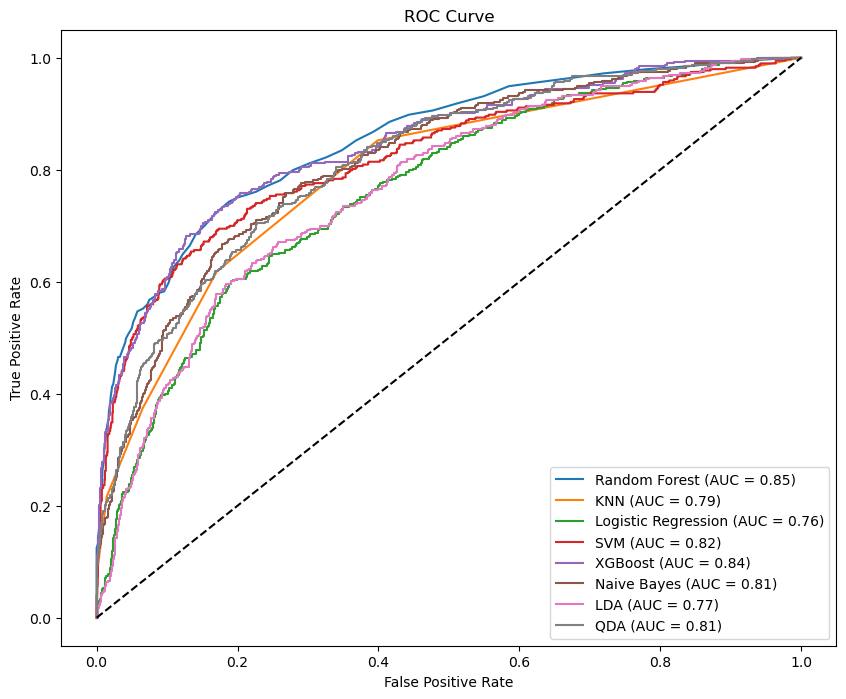

In [27]:
# Define the models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Store performance metrics
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    results[name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "ROC AUC": roc_auc
    }

# Print the results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()